In [1]:
# To force reloading. Useful when editing python files
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from processor_new import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Benchmarks 

# DataFrame

In [14]:
illi_bench = pd.read_csv('/Users/sebastian/Documents/PharoImages/illi-df-hg-clean/profiler-data/illiDFPlusHG.csv', comment='#', sep ='\t')

# Profiler median values
illi_input_01_df = illi_bench[ (illi_bench['suite'] == 'IllBenchmark') & (illi_bench['inputSize'] == '1/1000') & (illi_bench['criterion'] == 'total') ]
illi_mean_01 = illi_input_01_df['value'].mean()
illi_std_01 = illi_input_01_df['value'].std()

illi_input_1_df = illi_bench[ (illi_bench['suite'] == 'IllBenchmark') & (illi_bench['inputSize'] == '1/100') & (illi_bench['criterion'] == 'total') ]
illi_mean_1 = illi_input_1_df['value'].mean()
illi_std_1 = illi_input_1_df['value'].std()

illi_input_50_df = illi_bench[ (illi_bench['suite'] == 'IllBenchmark') & (illi_bench['inputSize'] == '1/2') & (illi_bench['criterion'] == 'total') ]
illi_mean_50 = illi_input_50_df['value'].mean()
illi_std_50 = illi_input_50_df['value'].std()

illi_input_100_df = illi_bench[ (illi_bench['suite'] == 'IllBenchmark') & (illi_bench['inputSize'] == '1') & (illi_bench['criterion'] == 'total') ]
illi_mean_100 = illi_input_100_df['value'].mean()
illi_std_100 = illi_input_100_df['value'].std()

# baseline
baseline_hg = illi_bench[ (illi_bench['suite'] == 'BaselineBenchmark') & (illi_bench['criterion'] == 'total') ]
baseline_mean = baseline_hg['value'].mean()
baseline_std = baseline_hg['value'].std()


# overhead using mean
print()
print('Overhead for 1/1000: ' + str(illi_mean_01 / baseline_mean))
print('Std for 1/1000: ' + str(illi_std_01 / baseline_mean))
print('Overhead for 1/100: ' + str(illi_mean_1  / baseline_mean))
print('Std for 1/100: ' + str(illi_std_1 / baseline_mean))
print('Overhead for 1/2: ' + str(illi_mean_50  / baseline_mean))
print('Std for 1/2: ' + str(illi_std_50 / baseline_mean))
print('Overhead for 1: ' +  str(illi_mean_100  / baseline_mean))
print('Std for 1: ' + str(illi_std_100 / baseline_mean))



Overhead for 1/1000: 1.1217817361038898
Std for 1/1000: 0.001058019049360465
Overhead for 1/100: 1.078106935974211
Std for 1/100: 0.0014107835236937742
Overhead for 1/2: 1.6455673748019648
Std for 1/2: 0.012204825322310237
Overhead for 1: 2.296450352028676
Std for 1: 0.03147629821347439


In [3]:
illi_bench_hg = pd.read_csv('/Users/sebastian/Documents/PharoImages/illi-df-hg-clean/profiler-data/illiDFPlusHG.csv', comment='#', sep ='\t')


# Profiler median values
illi_input_01_hg = illi_bench_hg[ (illi_bench_hg['suite'] == 'IllBenchmark') & (illi_bench_hg['inputSize'] == '1/1000') & (illi_bench_hg['criterion'] == 'total') ]
illi_median_01 = illi_input_01_hg['value'].median()
illi_mean_01 = illi_input_01_hg['value'].mean()

illi_input_1_hg = illi_bench_hg[ (illi_bench_hg['suite'] == 'IllBenchmark') & (illi_bench_hg['inputSize'] == '1/100') & (illi_bench_hg['criterion'] == 'total') ]
illi_median_1 = illi_input_1_hg['value'].median()
illi_mean_1 = illi_input_1_hg['value'].mean()

illi_input_50_hg = illi_bench_hg[ (illi_bench_hg['suite'] == 'IllBenchmark') & (illi_bench_hg['inputSize'] == '1/2') & (illi_bench_hg['criterion'] == 'total') ]
illi_median_50 = illi_input_50_hg['value'].median()
illi_mean_50 = illi_input_50_hg['value'].mean()

illi_input_100_hg = illi_bench_hg[ (illi_bench_hg['suite'] == 'IllBenchmark') & (illi_bench_hg['inputSize'] == '1') & (illi_bench_hg['criterion'] == 'total') ]
illi_median_100 = illi_input_100_hg['value'].median()
illi_mean_100 = illi_input_100_hg['value'].mean()

# no action profiler 
no_action_hg = illi_bench_hg[ (illi_bench_hg['suite'] == 'IllBenchmarkNoAction') & (illi_bench_hg['criterion'] == 'total') ]
no_action_median = no_action_hg['value'].median()
no_action_mean = no_action_hg['value'].mean()

# baseline
baseline_hg = illi_bench_hg[ (illi_bench_hg['suite'] == 'BaselineBenchmark') & (illi_bench_hg['criterion'] == 'total') ]
baseline_median = baseline_hg['value'].median()
baseline_mean = baseline_hg['value'].mean()


<Axes: ylabel='value'>

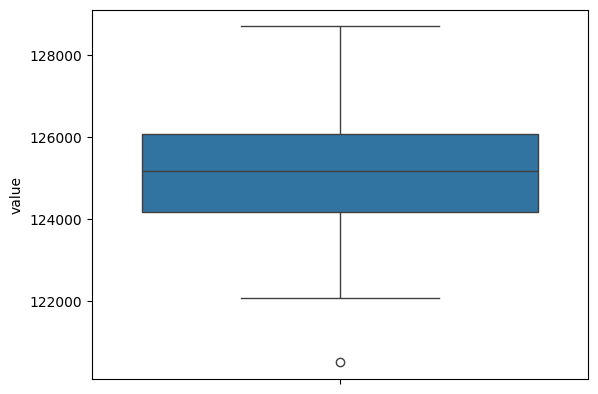

In [8]:
sns.boxplot(illi_input_100_hg['value'])

# Honey Ginger

In [3]:
illi_bench_hg = pd.read_csv('/Users/sebastian/Documents/PharoImages/illi-df-hg-clean/profiler-data/illiDFPlusHG.csv', comment='#', sep ='\t')

# Profiler median values
illi_input_01_hg = illi_bench_hg[ (illi_bench_hg['suite'] == 'IllBenchmarkHG') & (illi_bench_hg['inputSize'] == '1/1000') & (illi_bench_hg['criterion'] == 'total') ]
illi_median_01 = illi_input_01_hg['value'].median()
illi_mean_01 = illi_input_01_hg['value'].mean()

illi_input_1_hg = illi_bench_hg[ (illi_bench_hg['suite'] == 'IllBenchmarkHG') & (illi_bench_hg['inputSize'] == '1/100') & (illi_bench_hg['criterion'] == 'total') ]
illi_median_1 = illi_input_1_hg['value'].median()
illi_mean_1 = illi_input_1_hg['value'].mean()

illi_input_50_hg = illi_bench_hg[ (illi_bench_hg['suite'] == 'IllBenchmarkHG') & (illi_bench_hg['inputSize'] == '1/2') & (illi_bench_hg['criterion'] == 'total') ]
illi_median_50 = illi_input_50_hg['value'].median()
illi_mean_50 = illi_input_50_hg['value'].mean()

illi_input_100_hg = illi_bench_hg[ (illi_bench_hg['suite'] == 'IllBenchmarkHG') & (illi_bench_hg['inputSize'] == '1') & (illi_bench_hg['criterion'] == 'total') ]
illi_median_100 = illi_input_100_hg['value'].median()
illi_mean_100 = illi_input_100_hg['value'].mean()

# baseline
baseline_hg = illi_bench_hg[ (illi_bench_hg['suite'] == 'BaselineBenchmarkHG') & (illi_bench_hg['criterion'] == 'total') ]
baseline_median = baseline_hg['value'].median()
baseline_mean = baseline_hg['value'].mean()



print('Sampling rate 1/1000. Median: ' + str(illi_median_01) + ' Mean: ' + str(illi_mean_01))
print('Sampling rate 1/100. Median: ' + str(illi_median_1) + ' Mean: ' + str(illi_mean_1))
print('Sampling rate 1/2. Median: ' + str(illi_median_50) + ' Mean: ' + str(illi_mean_50))
print('Sampling rate 1. Median: ' + str(illi_median_100) + ' Mean: ' + str(illi_mean_100))

print('Baseline HG. Median: ' + str(baseline_median) + ' Mean: ' + str(baseline_mean))

# overhead using mean
print()
print('Overhead for 1/1000: ' + str(illi_mean_01 / baseline_mean))
print('Overhead for 1/100: ' + str(illi_mean_1  / baseline_mean))
print('Overhead for 1/2: ' + str(illi_mean_50  / baseline_mean))
print('Overhead for 1: ' +  str(illi_mean_100  / baseline_mean))


Sampling rate 1/1000. Median: 43280.0 Mean: 43272.666666666664
Sampling rate 1/100. Median: 53390.0 Mean: 53286.0
Sampling rate 1/2. Median: 59340.0 Mean: 58979.333333333336
Sampling rate 1. Median: 74990.0 Mean: 75586.33333333333
Baseline HG. Median: 23740.0 Mean: 23659.0

Overhead for 1/1000: 1.8290150330388717
Overhead for 1/100: 2.25225072910943
Overhead for 1/2: 2.492892063626245
Overhead for 1: 3.1948236752750887
